### Test Forward Pass

In [8]:
from dcn import DCN


dense_size = 30
emb_layers = [(100, 64)] * 26 
dnn_layers = [768, 768]
cross_layers = 4
low_rank = False
r = 256 
v1 = False
qr_flag = True
stacked = False

model = DCN(dense_size = dense_size, 
            emb_layers = emb_layers, 
            dnn_layers = dnn_layers, 
            cross_layers = cross_layers, 
            low_rank = low_rank,
            r = r,
            v1 = v1, 
            qr_flag = qr_flag, 
            stacked = stacked)
model

DCN(
  (emb_l): ModuleList(
    (0-25): 26 x QREmbeddingBag([10, 10], [64, 64], mode=mean)
  )
  (dnn): Sequential(
    (0): Linear(in_features=1694, out_features=768, bias=True)
    (1): ReLU()
    (2): Linear(in_features=768, out_features=768, bias=True)
    (3): ReLU()
  )
  (cross): CrossNet(
    (cross_net): Sequential(
      (0): Linear(in_features=1694, out_features=1694, bias=True)
      (1): Linear(in_features=1694, out_features=1694, bias=True)
      (2): Linear(in_features=1694, out_features=1694, bias=True)
      (3): Linear(in_features=1694, out_features=1694, bias=True)
    )
  )
  (projection): Linear(in_features=2462, out_features=1, bias=True)
)

In [9]:
import torch

batch_size = 8      # number of samples
bag_size = 4        # indices per sample per embedding table

# dense input: (B, dense_size)
x = torch.randn(batch_size, dense_size)

emb_indices = []
emb_offsets = []

for (num_emb, emb_dim) in emb_layers:
    # flattened indices for all bags of this table: length = B * bag_size
    idx = torch.randint(0, num_emb, (batch_size * bag_size,), dtype=torch.long)
    # one offset per bag/sample
    offsets = torch.arange(0, batch_size * bag_size, bag_size, dtype=torch.long)
    emb_indices.append(idx)
    emb_offsets.append(offsets)

emb_indices = torch.stack(emb_indices, dim=0)
emb_offsets = torch.stack(emb_offsets, dim=0)

with torch.no_grad():
    out = model(x, emb_indices, emb_offsets)

print("Output shape:", out.shape)

Output shape: torch.Size([8, 1])


In [3]:
# import dlrm_data_pytorch as dp
# import argparse

# # if you do not have the processed Criteo Kaggle dataset
# args_dict = {
#     "data_set": "kaggle",
#     "max_ind_range": 2**31-1,
#     "data_sub_sample_rate": 0.0,
#     "data_randomize": "total",
#     "raw_data_file": "<PATH>/Recsys/datasets/Criteo/train.txt",
#     "processed_data_file": "",
#     "memory_map": False,
#     "dataset_multiprocessing": False,
#     "mini_batch_size": 1024,
#     "num_workers": 0,
#     "test_mini_batch_size": 1024,
#     "test_num_workers": 0,
# }

# args = argparse.Namespace(**args_dict)
# train_data, train_ld, test_data, test_ld = dp.make_criteo_data_and_loaders(args)

In [ ]:
import dlrm_data_pytorch as dp
import argparse

# if you have the processed Criteo Kaggle datasset
args_dict = {
    "data_set": "kaggle",
    "max_ind_range": 2**31-1,
    "data_sub_sample_rate": 0.0,
    "data_randomize": "total",
    "raw_data_file": "<PATH>/Projects/Recsys/datasets/Criteo/train.txt",
    "processed_data_file": "<PATH>/Projects/Recsys/datasets/Criteo/kaggleAdDisplayChallenge_processed.npz",
    "memory_map": False,
    "dataset_multiprocessing": False,
    "mini_batch_size": 1024,
    "num_workers": 0,
    "test_mini_batch_size": 1024,
    "test_num_workers": 0,
}


args = argparse.Namespace(**args_dict)
train_data, train_ld, test_data, test_ld = dp.make_criteo_data_and_loaders(args)

Reading pre-processed data=/Users/paataugrekhelidze/Projects/Recsys/datasets/Criteo/kaggleAdDisplayChallenge_processed.npz
Sparse fea = 26, Dense fea = 13
Defined train indices...
Randomized indices across days ...
Split data according to indices...
Reading pre-processed data=/Users/paataugrekhelidze/Projects/Recsys/datasets/Criteo/kaggleAdDisplayChallenge_processed.npz
Sparse fea = 26, Dense fea = 13
Defined test indices...
Randomized indices across days ...
Split data according to indices...


In [17]:
import dcn
import importlib
importlib.reload(dcn)

top_index = [1459, 581, 9464586, 2078254, 304, 23, 12489, 632, 2, 91629, 5649, 7810062, 3185, 26, 14867, 5122127, 9, 5617, 2172, 3, 6598992, 17, 14, 275835, 104, 139427]


dense_size = 13
emb_dim = 64
emb_layers = [(vocab_size+1, emb_dim) for vocab_size in top_index]
dnn_layers = [768, 768]
cross_layers = 4
low_rank = False
r = 256 
v1 = False
qr_flag = True # use quotient-remainder trick to shrink embedding vocab size (my laptop will appreciate it)
stacked = False

model = DCN(dense_size = dense_size, 
            emb_layers = emb_layers, 
            dnn_layers = dnn_layers, 
            cross_layers = cross_layers, 
            low_rank = low_rank,
            r = r,
            v1 = v1, 
            qr_flag = qr_flag, 
            stacked = stacked)

device = "cpu"
model.to(device)

DCN(
  (emb_l): ModuleList(
    (0): QREmbeddingBag([39, 38], [64, 64], mode=mean)
    (1): QREmbeddingBag([25, 24], [64, 64], mode=mean)
    (2): QREmbeddingBag([3077, 3076], [64, 64], mode=mean)
    (3): QREmbeddingBag([1443, 1441], [64, 64], mode=mean)
    (4): QREmbeddingBag([18, 17], [64, 64], mode=mean)
    (5): QREmbeddingBag([6, 4], [64, 64], mode=mean)
    (6): QREmbeddingBag([113, 111], [64, 64], mode=mean)
    (7): QREmbeddingBag([26, 25], [64, 64], mode=mean)
    (8): QREmbeddingBag([3, 1], [64, 64], mode=mean)
    (9): QREmbeddingBag([304, 302], [64, 64], mode=mean)
    (10): QREmbeddingBag([76, 75], [64, 64], mode=mean)
    (11): QREmbeddingBag([2796, 2794], [64, 64], mode=mean)
    (12): QREmbeddingBag([57, 56], [64, 64], mode=mean)
    (13): QREmbeddingBag([6, 5], [64, 64], mode=mean)
    (14): QREmbeddingBag([123, 121], [64, 64], mode=mean)
    (15): QREmbeddingBag([2264, 2263], [64, 64], mode=mean)
    (16): QREmbeddingBag([4, 3], [64, 64], mode=mean)
    (17): QREmbe

In [18]:
import torch

emb_params = []
dense_params = []

for name, p in model.named_parameters():
    if not p.requires_grad:
        continue
    if name.startswith("emb_l."):
        emb_params.append(p)
    else:
        dense_params.append(p)

optimizer = torch.optim.Adagrad(
    [
        {"params": emb_params, "lr": 0.05},                 # embeddings: higher lr is common
        {"params": dense_params, "lr": 1e-3, "weight_decay": 1e-6},  # MLPs: lower lr + small wd
    ],
    initial_accumulator_value=1e-8,
)
    

In [28]:
solver = dcn.Solver(
    model = model,
    data = train_ld,
    optimizer = optimizer,
    device = "cpu",
    epochs = 10
)

solver.train()

Load [8/10] Loss 0.429204
[9/10] Loss: 0.427654 time: 136.90836100180942m
Checkpoint saved at ./checkpoints/checkpoint_epoch_9.pth
Checkpoint saved at ./checkpoints/last_checkpoint.pth


In [29]:
import os

# load last checkpoint
checkpoints = "./checkpoints"
checkpoint = torch.load(os.path.join(checkpoints, f"last_checkpoint.pth"))
model.load_state_dict(checkpoint["model_state_dict"])

<All keys matched successfully>

In [30]:
predictions = list()
targets = list()
model.eval()
counter = 0
nbatches = len(test_ld)
with torch.no_grad():
    for x, emb_offsets, emb_indices, target in test_ld:
        print(f"[{counter}/{nbatches}]")
        counter += 1
        x = x.to(device)
        emb_indices = emb_indices.to(device)
        emb_offsets = emb_offsets.to(device)
        target = target.to(device).float()
        if target.dim() == 1:
            target = target.unsqueeze(1)

        try:
            logits = model(x, emb_indices, emb_offsets)
            batch_probs = torch.nn.functional.sigmoid(logits)

            predictions.append(batch_probs)
            targets.append(target)
        except Exception as e:
            print(e)

[0/3198]
[1/3198]
[2/3198]
[3/3198]
[4/3198]
[5/3198]
[6/3198]
[7/3198]
[8/3198]
[9/3198]
[10/3198]
[11/3198]
[12/3198]
[13/3198]
[14/3198]
[15/3198]
[16/3198]
[17/3198]
[18/3198]
[19/3198]
[20/3198]
[21/3198]
[22/3198]
[23/3198]
[24/3198]
[25/3198]
[26/3198]
[27/3198]
[28/3198]
[29/3198]
[30/3198]
[31/3198]
[32/3198]
[33/3198]
[34/3198]
[35/3198]
[36/3198]
[37/3198]
[38/3198]
[39/3198]
[40/3198]
[41/3198]
[42/3198]
[43/3198]
[44/3198]
[45/3198]
[46/3198]
[47/3198]
[48/3198]
[49/3198]
[50/3198]
[51/3198]
[52/3198]
[53/3198]
[54/3198]
[55/3198]
[56/3198]
[57/3198]
[58/3198]
[59/3198]
[60/3198]
[61/3198]
[62/3198]
[63/3198]
[64/3198]
[65/3198]
[66/3198]
[67/3198]
[68/3198]
[69/3198]
[70/3198]
[71/3198]
[72/3198]
[73/3198]
[74/3198]
[75/3198]
[76/3198]
[77/3198]
[78/3198]
[79/3198]
[80/3198]
[81/3198]
[82/3198]
[83/3198]
[84/3198]
[85/3198]
[86/3198]
[87/3198]
[88/3198]
[89/3198]
[90/3198]
[91/3198]
[92/3198]
[93/3198]
[94/3198]
[95/3198]
[96/3198]
[97/3198]
[98/3198]
[99/3198]
[100/3198]

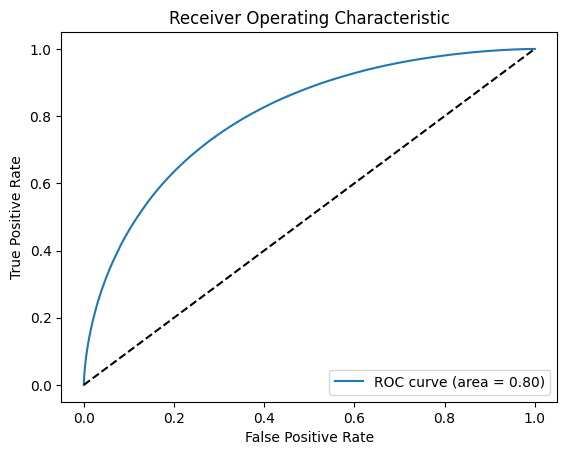

In [31]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

probs = torch.cat(predictions, dim=0)
target = torch.cat(targets, dim = 0)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(target, probs)
roc_auc = auc(fpr, tpr)

# Plot
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [32]:
roc_auc

0.8002929887773859